### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

In [3]:
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
#Facturacion de cada tienda

facturacion_tienda1 = tienda["Precio"].sum()
facturacion_tienda1


np.float64(1150880400.0)

In [10]:
facturacion_tienda2 = tienda2["Precio"].sum()
facturacion_tienda2


np.float64(1116343500.0)

In [11]:
facturacion_tienda3 = tienda3["Precio"].sum()
facturacion_tienda3


np.float64(1098019600.0)

In [12]:
facturacion_tienda4 = tienda4["Precio"].sum()
facturacion_tienda4

np.float64(1038375700.0)

In [15]:
#Facturacion total de todas las tiendas
facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
facturacion_total

np.float64(4403619200.0)

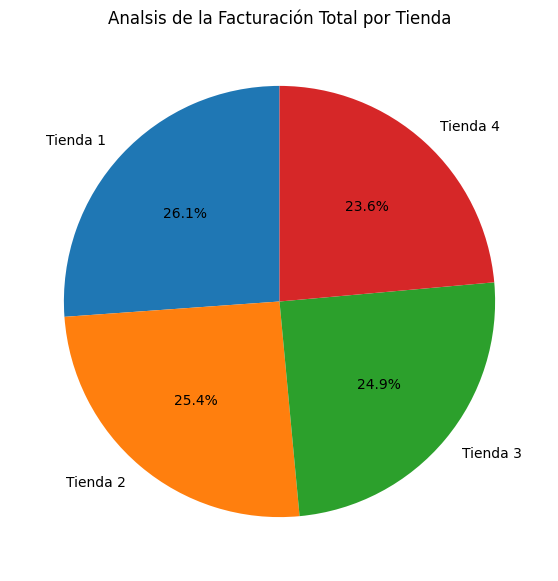

In [16]:
import matplotlib.pyplot as plt

# Facturación de cada tienda
facturaciones = [
    facturacion_tienda1,
    facturacion_tienda2,
    facturacion_tienda3,
    facturacion_tienda4
]

# Nombres de las tiendas
labels = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Gráfico circular
plt.figure(figsize=(7,7))
plt.pie(facturaciones, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Analsis de la Facturación Total por Tienda")
plt.show()


# 2. Ventas por categoría

In [17]:
# Cuenta las veces que se hicieron compras por cada categoría
categorias_mas_populares = df["Categoría del Producto"].value_counts()
categorias_mas_populares



,count
Categoría del Producto,
Muebles,1886
Electrónicos,1772
Juguetes,1290
Electrodomésticos,1149
Deportes y diversión,1113
Instrumentos musicales,753
Libros,742
Artículos para el hogar,730


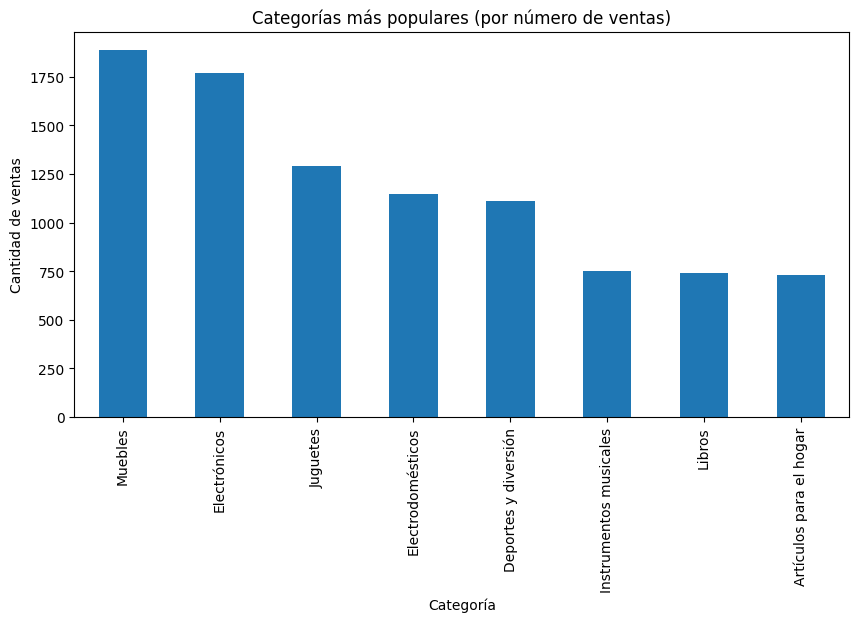

In [19]:
import matplotlib.pyplot as plt

# Top 10 categorías por número de ventas
categorias_mas_populares.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Categorías más populares por número de ventas")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.show()


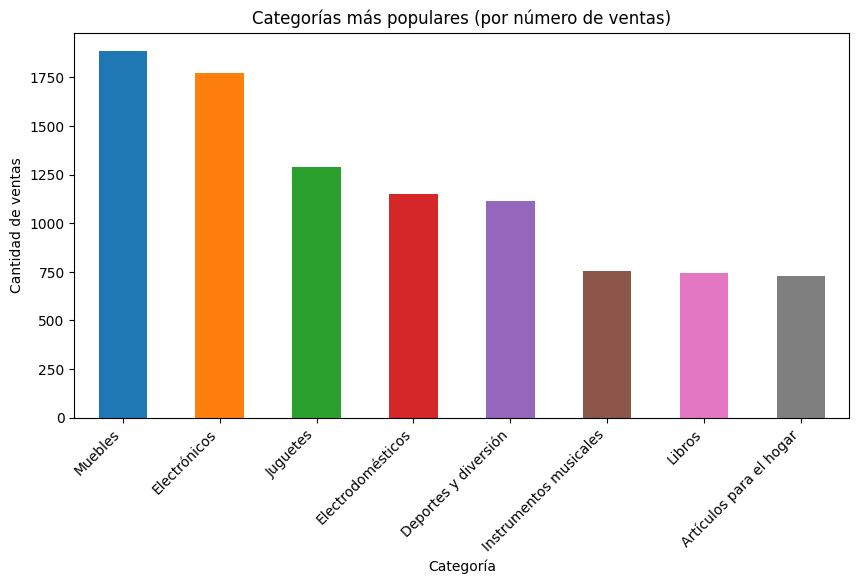

In [21]:
import matplotlib.pyplot as plt

# Top 10 categorías por número de ventas
top_categorias = categorias_mas_populares.head(10)

plt.figure(figsize=(10,5))
top_categorias.plot(
    kind="bar",
    color=plt.cm.tab10.colors  # paleta de 10 colores distintos
)
plt.title("Categorías más populares (por número de ventas)")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45, ha="right")
plt.show()


# 3. Calificación promedio de la tienda


In [22]:
#Promedio de clasificacion de la tienda.
promedio_calificacion = df["Calificación"].mean()
promedio_calificacion


np.float64(4.014520402755696)

# 4. Productos más y menos vendidos

In [24]:
# esta linea de codigo cuentas las ventas por producto
productos_vendidos = df["Producto"].value_counts()
productos_vendidos



,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199


In [25]:
# Producto más vendido
mas_vendido = productos_vendidos.head(1)
mas_vendido


,count
Producto,
Mesa de noche,210


In [26]:
# Producto menos vendido
menos_vendido = productos_vendidos.tail(1)
menos_vendido

,count
Producto,
Celular ABXY,157


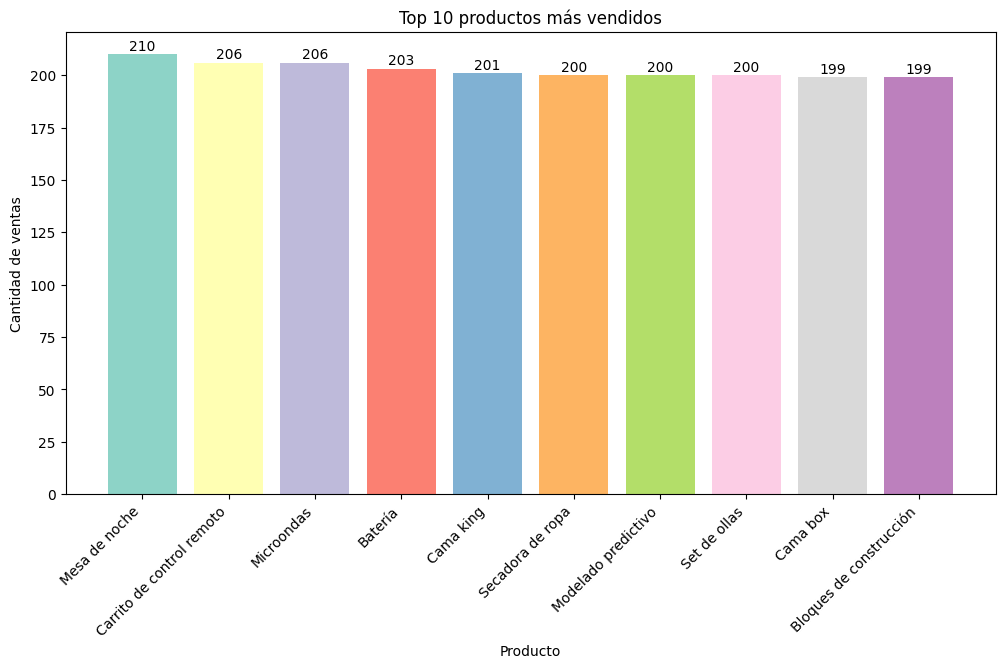

In [28]:
import matplotlib.pyplot as plt

# Top 10 productos más vendidos
top10_productos = df["Producto"].value_counts().head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top10_productos.index, top10_productos.values, color=plt.cm.Set3.colors)

# Título y etiquetas
plt.title("Top 10 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45, ha="right")

# Agregar los valores arriba de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.show()


# 5. Envío promedio por tienda

In [29]:
# Calcular costo promedio de envío por tienda
costo_envio_tienda1 = tienda["Costo de envío"].mean()
costo_envio_tienda1


np.float64(26018.60958033065)

In [30]:
costo_envio_tienda2 = tienda2["Costo de envío"].mean()
costo_envio_tienda2


np.float64(25216.235693090293)

In [31]:
costo_envio_tienda3 = tienda3["Costo de envío"].mean()
costo_envio_tienda3

np.float64(24805.680373039424)

In [32]:
costo_envio_tienda4 = tienda4["Costo de envío"].mean()
costo_envio_tienda4


np.float64(23459.457167090754)

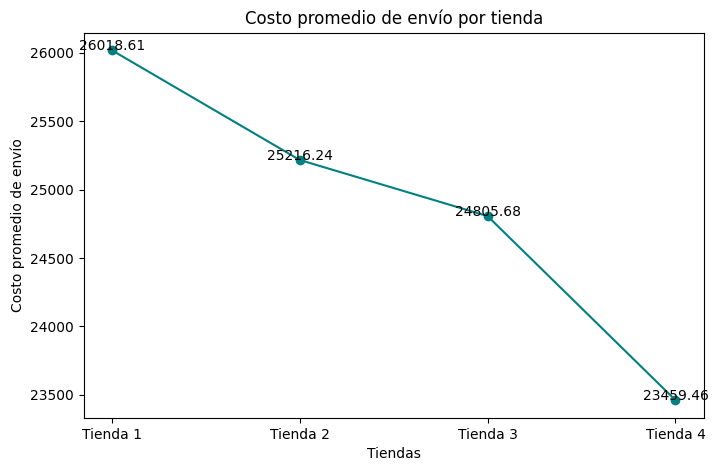

In [34]:
plt.figure(figsize=(8,5))
plt.plot(tiendas, costo_envio, marker='o', linestyle='-', color='teal')

plt.title("Costo promedio de envío por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo promedio de envío")

# Etiquetas de los puntos
for i, val in enumerate(costo_envio):
    plt.text(i, val + 0.1, round(val,2), ha='center', fontsize=10)

plt.show()

